In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt



In [2]:
training_data = datasets.FashionMNIST(
    root ="data",
    train = True,
    download = True,
    transform =ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=False,
    transform=ToTensor()
)

26422272it [00:18, 1399377.79it/s]                              


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



29696it [00:00, 119643.87it/s]                         


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



4422656it [00:02, 1980689.55it/s]                             


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



6144it [00:00, 5079795.74it/s]          

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

2147
53075
7444
36771
1947
8588
44814
18889
45788


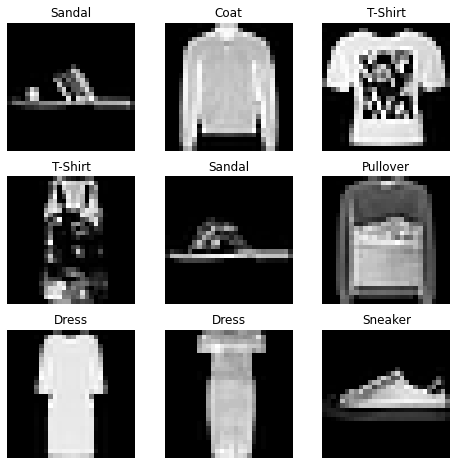

In [8]:
figure = plt.figure(figsize=(8,8))
cols, rows = 3,3
for i in range(1,cols*rows+1):
    sample_idx = torch.randint(len(training_data),size=(1,)).item() 
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(),cmap="gray")
plt.show()

In [9]:
import os 
import pandas as pd 
from torchvision.io import read_image



In [10]:
class CustomImageDataset(Dataset):
    # __init__ Dataset 객체가 생성될 때 한 번만 실행됨 
    # 이미지와 주석 파일이 포함된 디렉토리와 transform을 초기화
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels= pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    # 데이터셋의 샘플 개수를 반환
    def __len__(self):
        return len(self.img_labels)

    # 주어진 인덱스 idx에 해당하는 샘플을 데이터셋에서 불러오고 반환
    def __getitem__(self, idx) :
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        # 이미지를 텐서로 변환
        image = read_image(img_path)
        # csv에서 정답을 가져옴
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [46]:
from torch.utils.data import DataLoader 
#Dataset은 데이터셋의 feature를 가져오고 하나의 샘플에 label을 지정한다.
# 모델을 학습할 때, 일반적으로 샘플들을 미니배치로 전달하고, 에폭 마다 데이터를 다시 섞어서 과적합을 막고, multiprocessing을 이용하여 데이터 검색
#속도를 높인다
train_dataloader = DataLoader(training_data, batch_size = 64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size= 64,shuffle=True)

938
torch.Size([64, 1, 28, 28])
torch.Size([64])


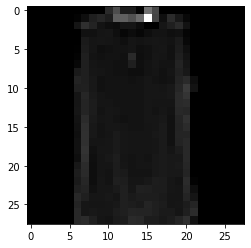

tensor(6)


In [110]:
# 연속적인 data들을 순차적으로 넣을 때(뽑을 때 iter로 변경후 next로 하나씩 출력)
print(len(train_dataloader))
train_features , train_labels= next(iter(train_dataloader))
print(train_features.size())
print(train_labels.size())
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img,cmap="gray")
plt.show()
print(label )